# Práctica Python + ML

Tarea a realizar:
1. Predecir el precio de los diamantes como una nueva variable continua.
2. Predecir el precio de los diamantes en 4 categorías: barato, normal, caro, muy caro.
3. Predecir el corte de los diamantes

In [1]:
# Importamos las librerias necesarias
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix, precision_score
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings("ignore")

A continuación haremos un breve análisis exploratorio de nuestros datos, este comprende la visualización de nuestros datos iniciales, la dimensión de nuestro datos y la información de nuestras variables. 

In [2]:
# Cargamos los datos y visualizamos como es el dataset
df = pd.read_csv('data/diamonds.csv', index_col=0) 
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
print("Observaciones: ", df.shape[0])
print("Características: ", df.shape[1])

Observaciones:  53940
Características:  10


In [4]:
# En primer lugar observemos los tipos de datos que contiene el dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


Breve descripción de nuestros datos:

- carat: peso del diamante.
- cut: calidad del corte.
- color: color del diamante.
- clarity: mide la claridad  del diamante.
- depth: porcentaje de longitud total.
- table: anchura del diamante superior en relación con el punto más ancho.
- price: precio en dólar americano.
- x: longitud en mm.
- y: anchura en mm.
- z: profundidad en mm.

En el paso siguiente vamos a generar una nueva columna categórica para el precio, ya que la necesitaremos posteriormente para el segundo ejercicio.

In [5]:
bins = (0,1000,2500,5500, np.inf)
labels=("barato", "normal", "caro", "muy caro")
price_cat = pd.cut(df["price"], bins=bins, labels=labels)
df=pd.concat((df,price_cat), axis=1)
df.columns = ['carat', 'cut','color', 'clarity','depth', 'table', 'price', 'x', 'y', 'z', 
        'price_cat']
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,price_cat
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,barato
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,barato
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,barato
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,barato
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,barato


Podemos observar que nuestros datos contienen variables continuas y variables categóricas, hacemos un breve análisis de estos datos: 

    - Análisis y preprocesado de variables continuas.
    - Análisis y preprocesado de variables categóricas.
    
*Nota: Vamos a separar las variables continuas y categóricas de nuestros datos originales, es decir, no incluiremos la variable `price_cat` que hemos creado.

In [6]:
cont = ["carat", "depth", "table", "x", "y", "z", "price"]
cat = ["cut", "color", "clarity"]

### Análisis de varibles numéricas

In [7]:
df.describe() 
#Nos muestra los estadísticos básicos de las variables contínuas.

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


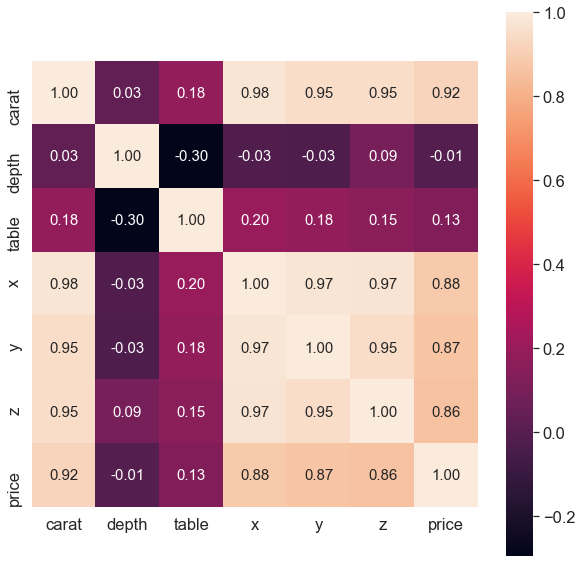

In [8]:
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
hm = sns.heatmap(df[cont].corr(), 
                 cbar=True,annot=True, square=True, fmt='.2f',
                 annot_kws={'size': 15})
plt.show();

Hemos obtenido las correlaciones entre nuestras variables, se ha de tener en cuenta que tenemos problemas de multicolinealidad a partir de una correlación igual o superior a 0.7.

### Análisis de variables categóricas

In [9]:
# Vemos que hay algunas columnas categóricas, para transformarlas de tipo objeto a variables categóricas podemos usar el siguiente código.
categorias = df["cut"].astype('category')
color = df["color"].astype('category')
claridad  = df["clarity"].astype('category')

In [10]:
df = df.drop(["cut","color","clarity"],axis=1)
df = pd.concat([df, categorias, color, claridad], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   carat      53940 non-null  float64 
 1   depth      53940 non-null  float64 
 2   table      53940 non-null  float64 
 3   price      53940 non-null  int64   
 4   x          53940 non-null  float64 
 5   y          53940 non-null  float64 
 6   z          53940 non-null  float64 
 7   price_cat  53940 non-null  category
 8   cut        53940 non-null  category
 9   color      53940 non-null  category
 10  clarity    53940 non-null  category
dtypes: category(4), float64(6), int64(1)
memory usage: 3.5 MB


In [11]:
d_cut = pd.get_dummies(df["cut"], drop_first=True, prefix="cut")
d_color = pd.get_dummies(df["color"], drop_first=True, prefix="col")
d_clarity = pd.get_dummies(df["clarity"], drop_first=True, prefix="clar")
df = pd.concat([df,d_cut,d_color,d_clarity], axis=1)
df.head()

,carat,depth,table,price,x,y,z,price_cat,cut,color,...,col_H,col_I,col_J,clar_IF,clar_SI1,clar_SI2,clar_VS1,clar_VS2,clar_VVS1,clar_VVS2
1,0.23,61.5,55.0,326,3.95,3.98,2.43,barato,Ideal,E,...,0,0,0,0,0,1,0,0,0,0
2,0.21,59.8,61.0,326,3.89,3.84,2.31,barato,Premium,E,...,0,0,0,0,1,0,0,0,0,0
3,0.23,56.9,65.0,327,4.05,4.07,2.31,barato,Good,E,...,0,0,0,0,0,0,1,0,0,0
4,0.29,62.4,58.0,334,4.20,4.23,2.63,barato,Premium,I,...,0,1,0,0,0,0,0,1,0,0
5,0.31,63.3,58.0,335,4.34,4.35,2.75,barato,Good,J,...,0,0,1,0,0,1,0,0,0,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   carat          53940 non-null  float64 
 1   depth          53940 non-null  float64 
 2   table          53940 non-null  float64 
 3   price          53940 non-null  int64   
 4   x              53940 non-null  float64 
 5   y              53940 non-null  float64 
 6   z              53940 non-null  float64 
 7   price_cat      53940 non-null  category
 8   cut            53940 non-null  category
 9   color          53940 non-null  category
 10  clarity        53940 non-null  category
 11  cut_Good       53940 non-null  uint8   
 12  cut_Ideal      53940 non-null  uint8   
 13  cut_Premium    53940 non-null  uint8   
 14  cut_Very Good  53940 non-null  uint8   
 15  col_E          53940 non-null  uint8   
 16  col_F          53940 non-null  uint8   
 17  col_G          53940 non-null  

A continuación haremos la división de nuestros datos, usaremos el 80% como datos de entrenamiento y el 20% como datos de testeo, usaremos `random_state=2022`.

In [13]:
train, test = train_test_split(df, test_size = 0.2, random_state=2022)

In [14]:
print("Datos de entrenamiento:", len(train))
print("Datos de testing:", len(test))

Datos de entrenamiento: 43152
Datos de testing: 10788


## 1. Predecir el precio de los diamantes como una nueva variable continua. 

*Nota: En el paso anterior hemos separado nuestras observaciones de entrenamiento y nuestras observaciones de testeo sin especificar nuestras variables predictores y nuestra variable dependiente, porque serán diferentes para cada ejercicio y las determinaremos en cada ejercicio de forma independiente.* 

En el primer ejercicio, nuestra variable dependiente es `price`, respecto a nuestras variables predictoras, usamos todas las variables excepto las que tenemos de tipo categóricas, e incluímos aquellas que hemos transformado a dummies.

In [15]:
X1_train = train.drop(["price", "cut","color", "clarity","price_cat"], axis=1)
y1_train = train["price"]
X1_test = test.drop(["price","cut","color", "clarity","price_cat"], axis=1)
y1_test = test["price"]

### Regresión Lineal

In [16]:
linear = LinearRegression()
linear.fit(X1_train, y1_train)
y_pred = linear.predict(X1_test)
mse = mean_squared_error(y1_test, y_pred)
rmse = mean_squared_error(y1_test, y_pred, squared=False)
score = linear.score(X1_test, y1_test)
print("Score: ", score) #R^2
print("mse:", mse) #Mead Square Error
print("rmse:", rmse) #Root Mean Square Error
print(linear.coef_)

Score:  0.9226434561013334
mse: 1252548.317745659
rmse: 1119.1730508485537
[ 1.11489743e+04 -6.12574520e+01 -2.54925721e+01 -9.62243527e+02
  2.31838936e+00 -5.05671212e+01  5.60955597e+02  8.16138109e+02
  7.44387383e+02  7.08156610e+02 -2.08053444e+02 -2.69209977e+02
 -4.77141899e+02 -9.88159504e+02 -1.45011949e+03 -2.37311420e+03
  5.29097185e+03  3.59353007e+03  2.64493072e+03  4.51884236e+03
  4.20701995e+03  4.93936759e+03  4.89016875e+03]


### Regresión Lasso

En este apartado, hacemos la selección de la mejor $\alpha$ y posteriormente con esta obtenemos los coeficientes del modelo y especificamos su score.

(0.9226434556846586, 1e-06)


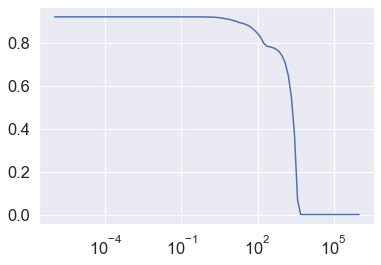

In [17]:
alphas = np.logspace(-6, 6, 100)

scores = []
best = (0,0)
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X1_train, y1_train);
    sc = lasso.score(X1_test, y1_test)
    scores.append(sc)
    if sc > best[0]:
        best = sc, alpha
        print(best) #Muestra el mejor score junto a la mejor alpha.
    
plt.plot(alphas, scores)
plt.xscale("log")
plt.show()

In [19]:
lasso = Lasso(alpha= best[1])
lasso.fit(X1_train, y1_train)
y_pred = lasso.predict(X1_test)
mse = mean_squared_error(y1_test, y_pred)
rmse = mean_squared_error(y1_test, y_pred, squared=False)
score = lasso.score(X1_test, y1_test)
print("Score: ", score)
print("mse:", mse) #Mead Square Error
print("rmse:", rmse) #Root Mean Square Error
print(lasso.coef_) #Obtenemos los coeficientes del modelo

Score:  0.9226434556846586
mse: 1252548.3244924108
rmse: 1119.1730538627219
[ 1.11489742e+04 -6.12574595e+01 -2.54925753e+01 -9.62243465e+02
  2.31836981e+00 -5.05670970e+01  5.60955495e+02  8.16138008e+02
  7.44387282e+02  7.08156516e+02 -2.08053391e+02 -2.69209924e+02
 -4.77141842e+02 -9.88159445e+02 -1.45011942e+03 -2.37311411e+03
  5.29097131e+03  3.59352956e+03  2.64493022e+03  4.51884184e+03
  4.20701943e+03  4.93936706e+03  4.89016823e+03]


### Regresión Ridge

Repetimos el proceso anterior, selección de la mejor $\alpha$ y obtención del score y coeficientes del modelo.

(0.9226430131441649, 0.01)


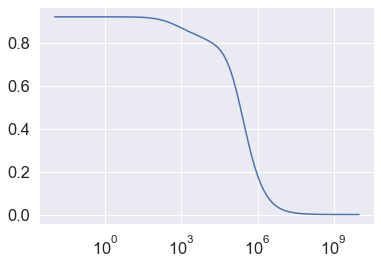

In [20]:
alphas = np.logspace(-2, 10, 100)

scores = []
best = (0,0)

for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X1_train, y1_train)
    sc = ridge.score(X1_test, y1_test)
    scores.append(sc)
    
    if sc > best[0]:
        best = sc, a
        print(best)
    
plt.plot(alphas,scores);
plt.xscale("log")
plt.show()

In [21]:
ridge = Ridge(alpha=best[1])
ridge.fit(X1_train, y1_train)
y_pred = ridge.predict(X1_test)
mse = mean_squared_error(y1_test, y_pred)
rmse = mean_squared_error(y1_test, y_pred, squared=False)
score = ridge.score(X1_test, y1_test)
print("Score: ", score)
print("mse:", mse) #Mead Square Error
print("rmse:", rmse) #Root Mean Square Error
print(ridge.coef_)

Score:  0.9226430131441649
mse: 1252555.490057507
rmse: 1119.1762551347786
[ 1.11486876e+04 -6.12558991e+01 -2.54932253e+01 -9.62140022e+02
  2.32210774e+00 -5.05659881e+01  5.60986056e+02  8.16173603e+02
  7.44420338e+02  7.08194866e+02 -2.08043115e+02 -2.69199618e+02
 -4.77126132e+02 -9.88141358e+02 -1.45009060e+03 -2.37307162e+03
  5.29039814e+03  3.59299316e+03  2.64440484e+03  4.51829861e+03
  4.20648213e+03  4.93881608e+03  4.88962206e+03]


### Elastic Net Regression

In [21]:
param_grid = { "alpha": [0.01, 0.25, 0.5, 0.75, 1],
              "l1_ratio": [0.01, 0.25, 0.5, 0.75, 1]}

grid = GridSearchCV(ElasticNet(), param_grid)
#elastic = ElasticNet(alpha=1.0, l1_ratio=0.5)
grid.fit(X1_train, y1_train)
print(grid.best_params_)

{'alpha': 0.75, 'l1_ratio': 1}


In [22]:
elastic = ElasticNet(alpha=0.75, l1_ratio=1)
elastic.fit(X1_train, y1_train)
score = elastic.score(X1_test, y1_test)
print("Score: ", score)
print(elastic.coef_)

Score:  0.9221869642221823
[11022.4565741    -66.58770374   -27.91223266  -925.76415973
    -0.           -35.40843366   483.18257182   739.14175637
   667.93136307   635.67601312  -168.22756973  -229.59823384
  -434.12382706  -943.85299591 -1397.34359022 -2310.38796935
  4880.68867219  3213.3017073   2268.33793586  4130.74178447
  3824.83981776  4543.85880714  4500.15882701]


### Regresión Polinómica

In [29]:
polynomial_features = PolynomialFeatures(2)
polynomial_train = polynomial_features.fit_transform(X1_train)
polynomial_test = polynomial_features.transform(X1_test)

linear_regression = LinearRegression()
linear_regression.fit(polynomial_train, y1_train)

y_pred = linear_regression.predict(polynomial_test)

mse = mean_squared_error(y1_test, y_pred)
rmse = np.sqrt(mse)
score = linear_regression.score(polynomial_test,y1_test)

print("mse:", mse) #Mead Square Error
print("rmse:", rmse) #Root Mean Square Error
print("R2:", score) #Coeficiente de Determinación

mse: 457563.41331246175
rmse: 676.4343377686127
R2: 0.9717411905258599


En este primer punto hemos intentado usar el contenido aprendido en la asignatura para la predicción de variables continuas (Regresión): la aplicación de diferentes modelos (Regresión Lineal, Ridge, Lasso, Elastic Net Regression y la regresión polinómica), el uso de bucles y el uso del `grid search` para optimizar nuestros resultados y hemos usado diferentes métricas para la evaluación de estos modelos:

    - Coeficiente de determinación. (más cerca a 1, mejor)
    - Mean Square Error (Se busca minimizar)
    - Root Mean Square Error (Se busca minimizar)
 

##  2. Predecir el precio de los diamantes en 4 categorías: barato, normal, caro, muy caro.

<AxesSubplot:ylabel='Frequency'>

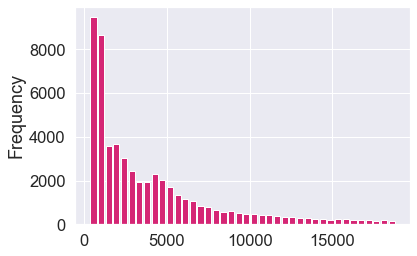

In [23]:
df.price.plot.hist(grid=True, bins=40, rwidth=0.8, color="#d52675")

Para realizar la clasificación hemos visualizado la distribución del precio de los diamantes y hemos tenido en cuenta los cuartiles que visualizamos al inicio de la tarea, la clasificación que se realizó en el apartado de análisis exploratorio es la siguiente: 

    - Barato: desde 0 hasta 1000.
    - Normal: desde 1001 hasta 2500.
    - Caro: desde 2501 hasta 5500.
    - Muy caro: desde 5501 en adelante. 
    
En este apartado, la variable dependiente es `price_cat`, esta varible representa la variable `price`, así que por esta razón eliminamos esta última (tiene la misma información). De las variables predictoras, usaremos todas excepto aquellas que hemos mantenido como variables de tipo 'category' que igualmente están representadas por las variables dummies. 

In [24]:
X2_train = train.drop(["price", "cut","color", "clarity","price_cat"], axis=1)
y2_train = train["price_cat"]
X2_test = test.drop(["price","cut","color", "clarity","price_cat"], axis=1)
y2_test = test["price_cat"]

### SVM

In [26]:
param_grid = {"C":[0.1, 1, 10, 100],  
              'gamma': [1, 0.01, 0.0001],
              'kernel': ['linear','rbf'],
             "random_state":[2022]}

svm = GridSearchCV(SVC(), param_grid)
svm.fit(X2_train, y2_train)
print(svm.best_params_)
svm_pred=svm.predict(X2_test)
print(classification_report(y2_test, svm_pred))

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf', 'random_state': 2022}
              precision    recall  f1-score   support

      barato       0.94      0.96      0.95      2921
        caro       0.91      0.91      0.91      2646
    muy caro       0.96      0.95      0.95      2602
      normal       0.91      0.88      0.90      2619

    accuracy                           0.93     10788
   macro avg       0.93      0.93      0.93     10788
weighted avg       0.93      0.93      0.93     10788



### Árboles de clasificación

In [27]:
param_grid = { "criterion": ["entropy", "gini"],
              "min_samples_split": [50, 75, 100],
             "max_depth": [20, 40, 60],
             "random_state":[2022]}

tree = GridSearchCV(DecisionTreeClassifier(), param_grid)
tree.fit(X2_train, y2_train)
print(tree.best_params_)
tree_pred = tree.predict(X2_test)
print(classification_report(y2_test, tree_pred))

{'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 50, 'random_state': 2022}
              precision    recall  f1-score   support

      barato       0.94      0.95      0.94      2921
        caro       0.89      0.89      0.89      2646
    muy caro       0.95      0.94      0.94      2602
      normal       0.88      0.88      0.88      2619

    accuracy                           0.91     10788
   macro avg       0.91      0.91      0.91     10788
weighted avg       0.91      0.91      0.91     10788



### Bosques aleatorios de decisión

In [28]:
param_grid = { "criterion": ["entropy", "gini"],
              "min_samples_split": [50, 75, 100],
             "max_depth": [20, 40, 60],
             "random_state":[2022]}

tree = GridSearchCV(DecisionTreeClassifier(), param_grid)
tree.fit(X2_train, y2_train)
print(tree.best_params_)
tree_pred = tree.predict(X2_test)
print(classification_report(y2_test, tree_pred))

{'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 50, 'random_state': 2022}
              precision    recall  f1-score   support

      barato       0.94      0.95      0.94      2921
        caro       0.89      0.89      0.89      2646
    muy caro       0.95      0.94      0.94      2602
      normal       0.88      0.88      0.88      2619

    accuracy                           0.91     10788
   macro avg       0.91      0.91      0.91     10788
weighted avg       0.91      0.91      0.91     10788



### K-nearest neighbors

In [29]:
param_grid = {"n_neighbors": [5, 15, 25],
             "p":[1,2]}

knn = GridSearchCV(KNeighborsClassifier(), param_grid)
knn.fit(X2_train, y2_train)
print(knn.best_params_)
knn_pred = knn.predict(X2_test)
print(classification_report(y2_test, knn_pred))

{'n_neighbors': 15, 'p': 1}
              precision    recall  f1-score   support

      barato       0.92      0.95      0.93      2921
        caro       0.83      0.89      0.86      2646
    muy caro       0.94      0.91      0.92      2602
      normal       0.88      0.82      0.85      2619

    accuracy                           0.89     10788
   macro avg       0.89      0.89      0.89     10788
weighted avg       0.89      0.89      0.89     10788



## 3. Predecir el corte de los diamantes 

En este apartado, nuestra variable dependiente es `cut`, de nuestros datos vamos a excluir las variables dummies relacionadas con nuestra variable dependiente y las variables que tenemos de tipo 'category', además normalizaremos nuestros datos de entrenamiento, excepto las variables dummies. 

In [23]:
X3_train = train.drop(["cut", "color", "clarity", "price_cat", "cut_Good", "cut_Ideal", "cut_Premium", "cut_Very Good" ], axis=1)
y3_train = train["cut"]
X3_test = test.drop(["cut",  "color", "clarity", "price_cat", "cut_Good", "cut_Ideal", "cut_Premium", "cut_Very Good"], axis=1)
y3_test = test["cut"]

In [24]:
escalar = ["carat","depth","table","price","x","y","z"]

scaler = StandardScaler()
X3_train[escalar] = scaler.fit_transform(X3_train[escalar])
X3_test[escalar] = scaler.fit_transform(X3_test[escalar])

X3_train[escalar].head()

,carat,depth,table,price,x,y,z
4980,0.447164,1.505994,0.239564,-0.048416,0.569404,0.500352,0.721377
29153,-0.903227,-0.523916,0.685750,-0.813352,-1.008766,-0.944272,-1.014529
19605,0.510463,-0.033938,0.239564,1.079018,0.658567,0.752726,0.693151
10315,0.489363,-0.033938,0.239564,0.209578,0.685315,0.639593,0.650811
14708,-1.050926,0.036059,1.131935,-0.835208,-1.285168,-1.231457,-1.240337


### SVM

In [ ]:
param_grid = {"C":[0.1, 1, 10, 100],  
              'gamma': [1, 0.01, 0.0001],
              'kernel': ['linear','rbf'],
             "random_state":[2022]}

svm = GridSearchCV(SVC(), param_grid)
svm.fit(X3_train, y3_train)
print(svm.best_params_)
svm_pred=svm.predict(X3_test)
print(classification_report(y3_test, svm_pred))

*Nota: en el método anterior no he conseguido obtener los resultados porque estaba tardando, más de un día hasta que lo corté.*

### Árboles de clasificación

In [26]:
param_grid = { "criterion": ["entropy", "gini"],
              "min_samples_split": [50, 75, 100],
             "max_depth": [20, 40, 60],
             "random_state":[2022]}

tree = GridSearchCV(DecisionTreeClassifier(), param_grid)
tree.fit(X3_train, y3_train)
print(tree.best_params_)
tree_pred = tree.predict(X3_test)
print(classification_report(y3_test, tree_pred))

{'criterion': 'gini', 'max_depth': 40, 'min_samples_split': 75, 'random_state': 2022}
              precision    recall  f1-score   support

        Fair       0.90      0.85      0.88       323
        Good       0.41      0.69      0.52       990
       Ideal       0.81      0.90      0.85      4333
     Premium       0.76      0.56      0.65      2736
   Very Good       0.57      0.48      0.52      2406

    accuracy                           0.70     10788
   macro avg       0.69      0.70      0.68     10788
weighted avg       0.71      0.70      0.70     10788



### Bosques aleatorios de decisión

In [27]:
param_grid = {"n_estimators":[100, 300, 500],
            "criterion": ["entropy", "gini"],
             "max_depth":[10, 20, 30],
             "random_state":[2022]}

forest = GridSearchCV(RandomForestClassifier(), param_grid)
forest.fit(X3_train, y3_train)
print(forest.best_params_)
forest_pred = forest.predict(X3_test)
print(classification_report(y3_test, forest_pred))

{'criterion': 'gini', 'max_depth': 30, 'n_estimators': 500, 'random_state': 2022}
              precision    recall  f1-score   support

        Fair       0.91      0.82      0.86       323
        Good       0.76      0.66      0.71       990
       Ideal       0.81      0.93      0.87      4333
     Premium       0.75      0.79      0.77      2736
   Very Good       0.64      0.49      0.55      2406

    accuracy                           0.77     10788
   macro avg       0.77      0.74      0.75     10788
weighted avg       0.76      0.77      0.76     10788



### K-nearest neighbors

In [33]:
param_grid = {"n_neighbors": [5, 15, 25],
             "p":[1,2]}

knn = GridSearchCV(KNeighborsClassifier(), param_grid)
knn.fit(X3_train, y3_train)
print(knn.best_params_)
knn_pred = knn.predict(X3_test)
cm = confusion_matrix(y3_test, knn_pred) #Matriz de confusión
print(cm)
print(classification_report(y3_test, knn_pred))

{'n_neighbors': 15, 'p': 2}
[[ 187  105    5    9   17]
 [  18  406   66  189  311]
 [   2    4 4008  215  104]
 [   0   16  419 2050  251]
 [   1  169  809  893  534]]
              precision    recall  f1-score   support

        Fair       0.90      0.58      0.70       323
        Good       0.58      0.41      0.48       990
       Ideal       0.76      0.92      0.83      4333
     Premium       0.61      0.75      0.67      2736
   Very Good       0.44      0.22      0.29      2406

    accuracy                           0.67     10788
   macro avg       0.66      0.58      0.60     10788
weighted avg       0.64      0.67      0.64     10788



En los ejerciciós dos y tres hemos clasificado usando diferentes métodos (SVM, árbol de clasificación, bosques aleatorios para la clasificación y k-nearest neighbors), hemos implementado el `grid_search` para optimizar nuestros modelos y como resumen de los resultados hemos usado el `classification_report`, en el último método hemos añadido `confusion_matrix`, como método alternativo de evaluación.

En el caso de la matriz de confusión podemos observar, por ejemplo, en la última fila nos muestra en la última columna los aciertos y de la primera a la cuarta las veces que se ha clasificado mal, podemos observar que hay muchos errores entre las clasificaciones 'Ideal', 'Premium' y 'Very Good', esto nos puede llevar a pensar que podríamos crear una mejor partición al pasar de la variable continua 'price' a 'price_cat'.  

Finalmente, entre todos los resultados que nos muestra el `classification _report`, nos tenemos que fijar en el número mayor del 'weighted avg'/'f1-score' para seleccionar nuestro mejor modelo.